# Amazon Stock Price Prediction

The task is to predict the day price direction of Amazon.com, Inc. (AMZN).

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell. Therefore, the target would be a binary classification whether the next day closing price will be higher than the opening price.

We have data for the period from 1997 up to the year 2020 that we have split into training (1997-2016), validation (2016-2018) and testing (2018-2020) periods. The data is available in the AMZN_train.csv, AMZN_val.csv and AMZN_test.csv files, respectively.

In [11]:
import pandas as pd

In [20]:
# load the training set
df_train = pd.read_csv("C:/Users/12066/Desktop/JNWD/AMZN_train.csv")

In [21]:
# (#rows, #columns)
df_train.shape


(4781, 7)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [23]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [24]:
df_train["Date"].describe()

count           4781
unique          4781
top       1997-05-15
freq               1
Name: Date, dtype: object

In [25]:
df_train["Date"].min() , df_train["Date"].max()

('1997-05-15', '2016-05-13')

In [26]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)

<AxesSubplot:xlabel='Date'>

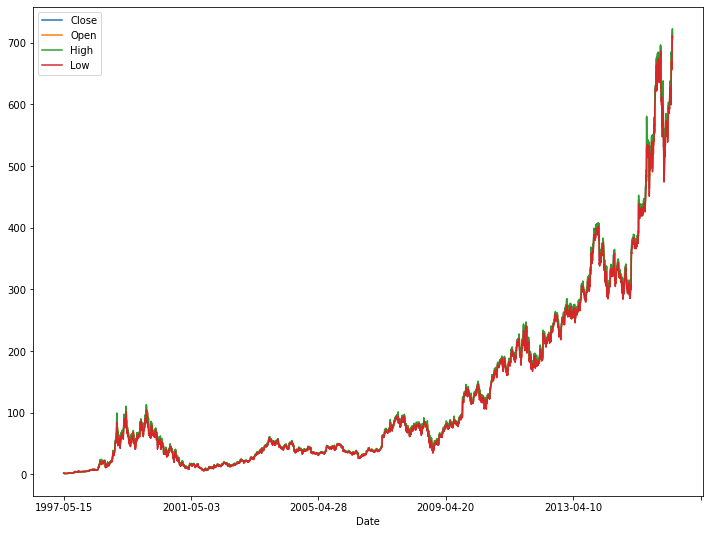

In [28]:
df_train.plot(x="Date", y=["Close", "Open" , "High" , "Low" ])

All prices are very close to each other since the lines are overlapping nearly everywhere. But, the price has grown significantly over the years, starting at around $100 at the beginning of the century, rising to almost \$700 only 13 years later!

We would like to repeat the same analysis for the validation and testing set, to make sure that they follow a similar distribution and that there are no surprising errors there. It makes sense to create a function to repeat the process we did for the training set, instead of having to rewrite (or copy-paste) the same code again. Let's do that.

In [29]:
def analyze(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info
    print("\n", dataframe.describe, "\n")
    print("The data ranges from", dataframe["Date"].min(), "to" , dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 


 <bound method NDFrame.describe of            Date         Open         High          Low        Close  \
0    2016-05-16   710.130005   713.250000   700.280029   710.659973   
1    2016-05-17   709.900024   714.469971   693.909973   695.270020   
2    2016-05-18   689.559998   702.539978   688.760010   697.450012   
3    2016-05-19   691.880005   699.400024   689.559998   698.520020   
4    2016-05-20   701.049988   707.239990   700.000000   702.799988   
..          ...          ...          ...          ...          ...   
498  2018-05-08  1595.000000  1596.880005  1582.510010  1592.390015   
499  2018-05-09  1600.000000  1608.000000  1592.000000  1608.000000   
500  2018-05-10  1608.479980  1615.599976  1603.439941  1609.079956   
501  2018-05-11  1610.989990  1611.099976  1597.890015  1602.910034   
502  2018-05-14  1604.000000  1611.180054  1600.050049  1601.540039  

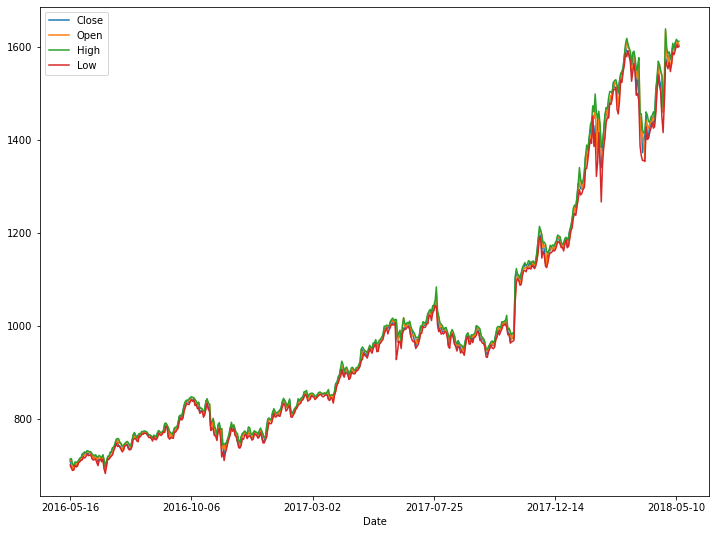

In [30]:
df_val = pd.read_csv("C:/Users/12066/Desktop/JNWD/AMZN_val.csv")
analyze(df_val)

The validation set has the same properties as the training set: no null values, clear column types, and a valid date range. The stocks have continued to grow in this period.

shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 


 <bound method NDFrame.describe of            Date         Open         High          Low        Close  \
0    2018-05-15  1587.800049  1587.800049  1565.219971  1576.119995   
1    2018-05-16  1577.500000  1594.430054  1576.670044  1587.280029   
2    2018-05-17  1580.560059  1594.040039  1573.000000  1581.760010   
3    2018-05-18  1581.329956  1583.589966  1572.099976  1574.369995   
4    2018-05-21  1585.000000  1592.050049  1575.000000  1585.459961   
..          ...          ...          ...          ...          ...   
499  2020-05-08  2372.139893  2387.239990  2357.000000  2379.610107   
500  2020-05-11  2374.699951  2419.669922  2372.110107  2409.000000   
501  2020-05-12  2411.850098  2419.000000  2355.000000  2356.949951   
502  2020-05-13  2366.800049  2407.699951  2337.800049  2367.919922   
503  2020-05-14  2361.010010  2391.370117  2353.209961  2388.850098  

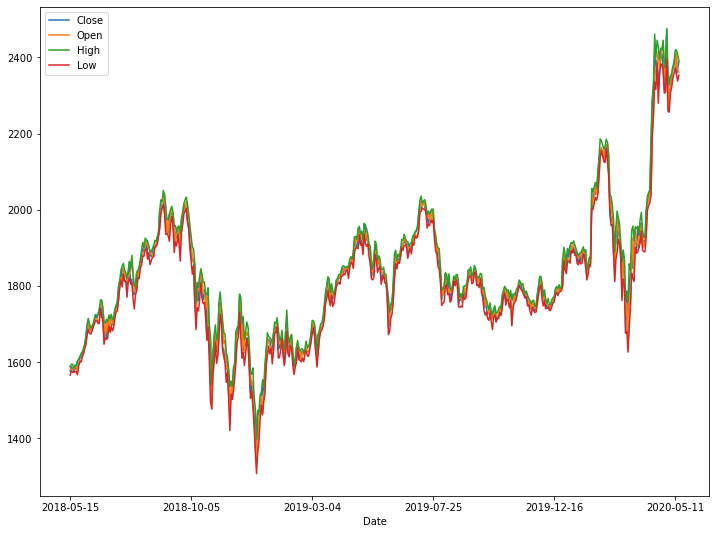

In [32]:
df_test = pd.read_csv("C:/Users/12066/Desktop/JNWD/AMZN_test.csv")
analyze(df_test)

The same comment that holds for the validation set, is also true for the test set. The stocks again continue to grow, but we observe some volatility in this period.

Once we have done our exploration of the data, we can move on to the predictive modeling part of the task. The task was to predict if the next day's closing price will be higher than the opening price. We do not have that information explicitly in our data, so we have to infer it.

This is relatively simple, we just need to compare the closing and opening prices one day in advance.

To achieve that, first, we will make sure that the data is sorted by the date. We can use the sort_values method and pass in the Date column as a parameter, sorting it in ascending order.

Next, we need to shift the DataFrame by one row / one day and compare the prices. Pandas has a method for doing exactly that, the shift method. We specify a period of minus one (so that we shift the data from the next day back). Because it is a logical operation, Pandas would return a True / False result for each comparison. We want this to be presented as 1 / 0 for the machine learning models, so we will map it to type int. To store all of this information, we will create a new column, called Target.

In [33]:
# make sure that our data is sorted by date
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In [35]:
# notice that we shift by a period of '-1', this takes the next day's price direction for the current day
# a positive period will take the days from the past
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [36]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


In [37]:
df_train["Target"].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

In [38]:
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [39]:
df_val["Target"].value_counts()

0    255
1    248
Name: Target, dtype: int64

In [40]:
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [41]:
df_test["Target"].value_counts()

1    255
0    249
Name: Target, dtype: int64

At this point, we can start building some machine learning models to predict the target variable. But, before we do that, it might be useful to engineer some additional features that may help us better predict the price direction. In the next section, we will explore some possibilities for doing feature engineering.

# Feature Engineering

We know that the stock prices are time-dependent and that the next day's price depends on prices (and many other things) from previous days.

We want to somehow take into account all the values in the last n days, capturing the trend, or the magnitude of price change.

A simple solution would be to calculate a moving average. A moving average computes the arithmetic mean of a sliding window. For each day X, the moving average of order n would be the arithmetic mean of the prices from the days X - 1, X - 2, ... X - n. Pandas has implemented this method. The rolling method provides us with an interface for sliding (in Pandas terminology - rolling) window calculations. The following cells calculate the 3- and 7-days moving average, and add them as a feature into the data set.

Note : Remember that we have our data sorted from before. If the data is not sorted by the date, the results from the rolling() method would be invalid.

In [56]:
df_train["MovingAverage3"] = (df_train["Close"] - df_train["Open"]).rolling(window = 3 , min_periods = 1 ). mean()
df_val["MovingAverage3"] = (df_val["Close"] - df_val["Open"]).rolling(window = 3 , min_periods = 1 ). mean()
df_test["MovingAverage3"] = (df_test["Close"] - df_test["Open"]).rolling(window = 3 , min_periods = 1 ). mean()

In [55]:
df_train["MovingAverage7"] = (df_train["Close"] - df_train["Open"]).rolling(window = 7 , min_periods = 1 ). mean()
df_val["MovingAverage7"] = (df_val["Close"] - df_val["Open"]).rolling(window = 7 , min_periods = 1 ). mean()
df_test["MovingAverage7"] = (df_test["Close"] - df_test["Open"]).rolling(window = 7 , min_periods = 1 ). mean()

In [57]:
# current price direction
# we should repeat the procedure for all three sets (train, val, test)
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

In [58]:
# price range
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]

In [59]:
df_train.sample( 10, random_state = 50)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Today_Direction,Price_Range,MovingAverage7,MovingAverage3
4568,2015-07-13,448.290009,457.869995,447.540009,455.570007,455.570007,3956800,1,3.263346,7.279998,10.329986,1.100006,3.263346
4139,2013-10-25,358.600006,368.399994,352.619995,363.390015,363.390015,12036800,0,1.096670,4.790009,15.779999,2.561428,1.096670
2659,2007-12-10,94.309998,94.349998,92.300003,93.019997,93.019997,5180600,0,-0.203334,-1.290001,2.049995,0.405716,-0.203334
1989,2005-04-13,34.349998,34.709999,34.150002,34.299999,34.299999,4125100,0,0.060000,-0.049999,0.559997,0.002857,0.060000
4224,2014-02-28,360.600006,365.869995,357.079987,362.100006,362.100006,3882000,1,1.450002,1.500000,8.790008,1.654288,1.450002
802,2000-07-20,40.937500,43.375000,39.500000,40.312500,40.312500,6945700,1,0.125000,-0.625000,3.875000,0.553571,0.125000
4007,2013-04-19,258.160004,262.880005,257.500000,260.320007,260.320007,2602500,1,-2.876659,2.160003,5.380005,-0.157135,-2.876659
3997,2013-04-05,255.720001,256.179993,253.669998,255.479996,255.479996,2557400,1,-1.160008,-0.240005,2.509995,-0.101438,-1.160008
4718,2016-02-16,519.479980,524.450012,511.660004,521.099976,521.099976,5118500,1,3.549988,1.619996,12.790008,-1.727151,3.549988
1865,2004-10-14,39.450001,39.549999,38.730000,39.099998,39.099998,9026200,0,-0.373333,-0.350003,0.819999,-0.197142,-0.373333


# Classical Machine Learning Algorithms

The sklearn library is the most popular library in Python for implementing classical machine learning algorithms. We can use it to try and test a few of them. In the following cells we implement:

1) Logistic regression
2) Decision tree
3) Random forest
4) Gradient boosting ensemble

All of these algorithms are implemented in the sklearn.linear_model module. All of them share also the same interface, i.e., we can use the same procedure for implementing any of them.

After fitting them to the training data, we are going to evaluate their performance on the validation set by estimating the AUC metric.

For easier manipulation, we will specify the target column and the feature (input) columns as lists, which we will then use to project the corresponding data frame.

In [63]:
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "MovingAverage3",
    "MovingAverage7"
]

In [64]:
X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_test[X_cols]
y_test = df_test[y_col]

We start our modeling phase with a LogisticRegression model. The inner workings of this algorithm are very similar to that of linear regression, with the difference being that we use logistic regression for classification by modifying the output with a sigmoid function.

To calculate the AUC value, and to plot the ROC curve, we are using the plot_roc_curve(...) method from the sklearn.metrics module and we pass in the fitted model and the validation set.

For this, and throughout the latter algorithms, we are going to use the default parameters for the models. Feel free to explore the documentation and experiment with different values, and try to get a better AUC. However, for reproducibility, i.e., control over the random parts of the algorithm, we are going to set a fixed random seed.

In [67]:
#for reproducibilty
RANDOM_SEED = 42

C:\Users\12066\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


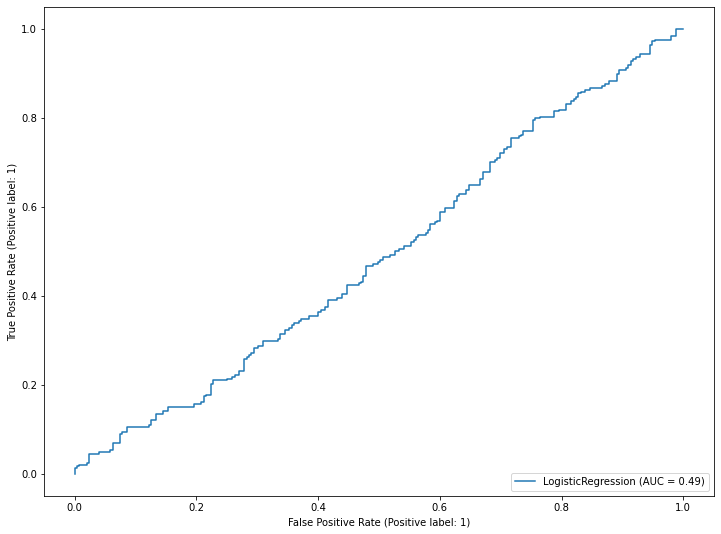

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# use default parameters
lr = LogisticRegression()

# fit to train set
lr.fit(X_train, y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(lr, X_val, y_val)

Logistic regression does not work well for this problem. Having AUC < 0.5 means that the classifier is worse than just randomly guessing the output. Given that we are dealing with a very difficult problem, any AUC > 0.5 would suffice for this task.

# Decision Tree

Next, we will try a decision tree. Decision trees deal better with non-linear spaces, so they might be able to produce a better model than logistic regression.

C:\Users\12066\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


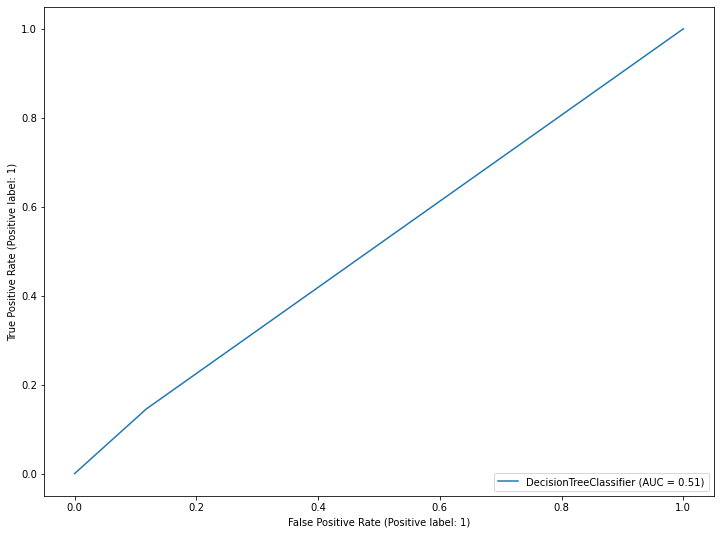

In [68]:
from sklearn.tree import DecisionTreeClassifier

# remember to use the random seed to be able to reproduce the same results
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train)

plot_roc_curve(dt, X_val, y_val)

The decision tree outperforms the logistic regression model by 0.02, and its AUC is above 0.5!

# Random Forest

Now we will try to use many decision trees, i.e., a forest. Random forest is an ensemble model that builds multiple decision trees, each with a different (random) sub-set of attributes. It is generally expected that an ensemble model would outperform a base learner (i.e., the combination of predictions from many decision trees would be better / more stable than the prediction of just one decision tree).

C:\Users\12066\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


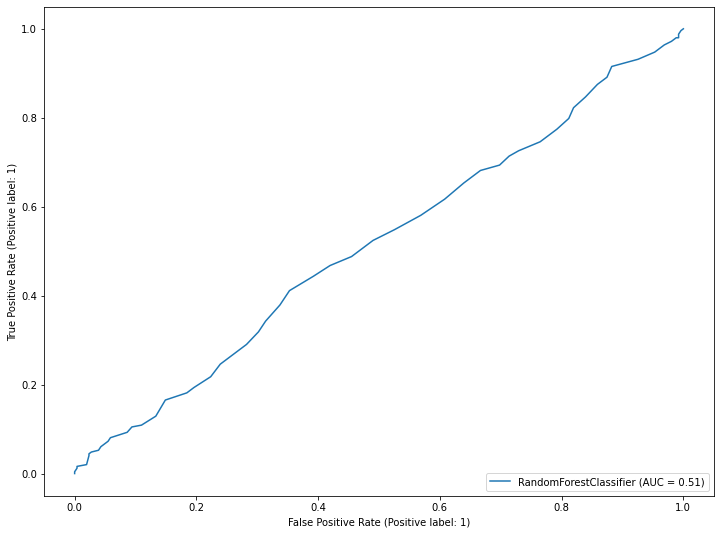

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

plot_roc_curve(rf, X_val, y_val)

Contrary to our expectations, the model does not outperform the decision tree, it actually performs the same.

# Gradient Boosting Ensemble


One last ensemble technique that we would like to try is gradient boosting. This algorithm sets up the stage for our next part, where we will try a deep learning approach to solve the problem. A gradient boosting classifier is structurally the same as any ensemble learner - it is a collection of base learners (think of these as decision trees for simplicity, in theory, they can be anything). The algorithm induces (learns) the trees one by one, and in each iteration, it gives greater weight to those instances that were wrongly misclassified, so the next tree would "pay more attention" while training on them. Sometimes this can improve performance.

C:\Users\12066\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


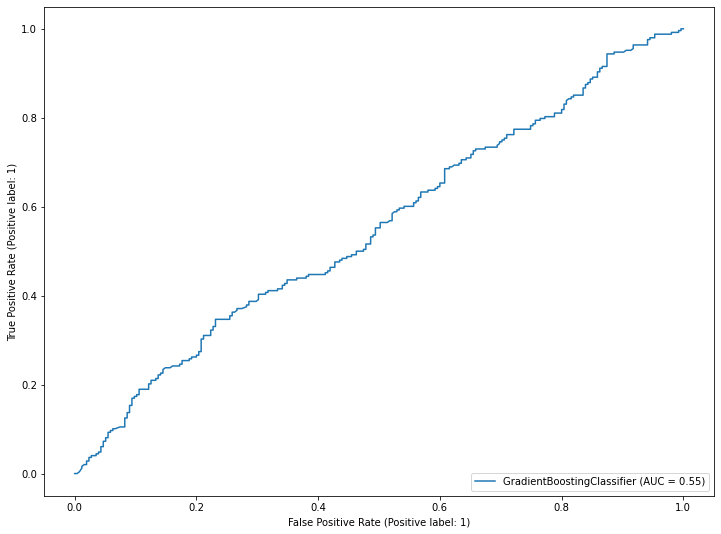

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

plot_roc_curve(gb, X_val, y_val)

In [71]:
import tensorflow as tf

# set seed for reproducibility of results
tf.random.set_seed(RANDOM_SEED)

print("Tensorflow version", tf.__version__)

Tensorflow version 2.10.0


Keras is the most popular framework for designing deep learning models. In the next cell, we implement a sequential neural network with:

1. Normalization layer that scales the data to a common range
2. A dense layer with 10 neurons and a ReLU activation function.
3. A dropout layer with a 0.2 probability of dropping a neuron.
4. Another dense layer with 5 neurons and ReLU activation function.
5. An output layer of just one neuron with a sigmoid activation function (the same one mentioned in the logistic regression part above)

Feel free to change, add or remove any of the layers and try to design a better-performing model. Given that our data is relatively small, both in terms of training instances as well as in the number of columns, it is recommended that the model is small, otherwise, it will overfit very quickly.

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

In [74]:
# this configures the model's loss function, weight optimizer, and metrics to keep track of
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)

In [75]:
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

In [76]:
# the model.fit(...) method returns a 'history' object with stats about the training
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50
150/150 [==============================] - 2s 5ms/step - loss: 161.7508 - auc: 0.5068 - val_loss: 10.7797 - val_auc: 0.5000 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 10.3997 - auc: 0.4866 - val_loss: 3.1629 - val_auc: 0.5075 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 5.8994 - auc: 0.4996 - val_loss: 1.1521 - val_auc: 0.4895 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 3.1316 - auc: 0.5057 - val_loss: 1.1023 - val_auc: 0.5086 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 2.1167 - auc: 0.5087 - val_loss: 0.8458 - val_auc: 0.4906 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 2.0306 - auc: 0.5094 - val_loss: 0.6993 - val_auc: 0.5099 - lr: 9.9005e-04
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 1.6832 - auc: 0.5033 - val_loss: 0.7093 - val_au

We let the model train for 50 epochs. You can see the change in the learning rate, which is due to the learning rate scheduler callback that we have implemented. The early stopping callback fired, at the 27th epoch, which means that the validation loss has not been improving over time. However, we observe that both the training and the validation AUC are very close to 0.5, improving the overall score only over the logistic regression model.

With the call of the model.summary() method we can get an overview of the structure of the model.

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 192
Trainable params: 171
Non-trainable params: 21
_________________________________________________________

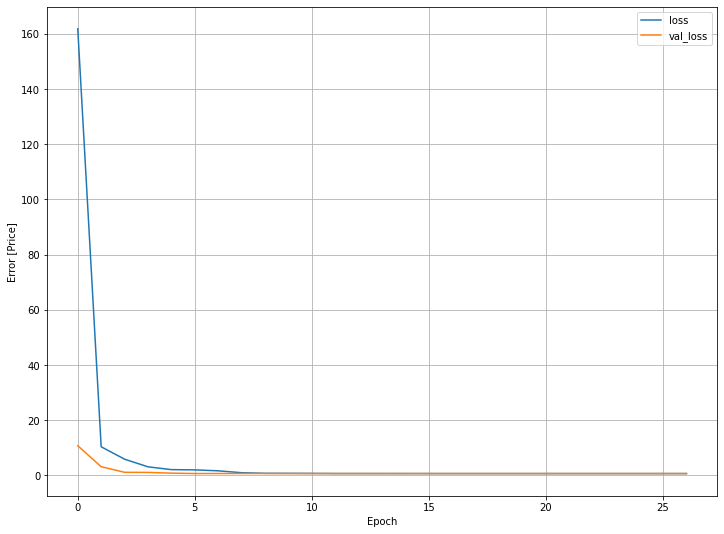

In [78]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

The training loss starts high, falls steeply after the first epoch, and then remains pretty much equal, with very little improvement over time. The validation loss does not change, implying that the model is overfitting the training data. There are many possible reasons for this: too complex model, small data set, features that are not predictive, etc. The same situation is observed for the AUC metric in the plot below. The training AUC does vary, reaching its highest point at around 0.506 in the first epoch, but the validation AUC remains fixed at 0.5.

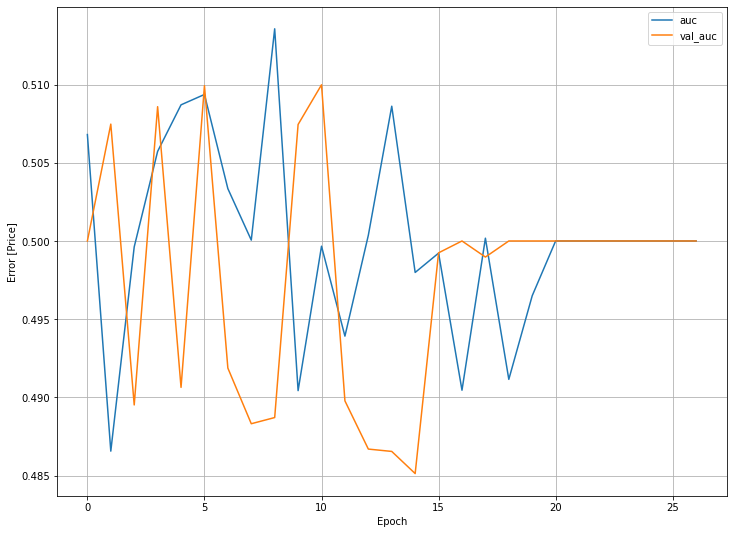

In [79]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

# Conclusion
The gradient boosting classifier provided the best AUC score on the validation set. It is a common machine learning practice to train multiple models on the same train/validation data set and provide a model that works best. To simulate a production environment, we have held the test set aside until now.

In the next cell, we are going to evaluate the performance of the gradient boosting classifier on the test set. This is simple as calling plot_roc_curve with the test set instead of the validation one.

As a bonus, in the last cell, we are showing a feature importance plot, which plots the importance of each feature in regard to the predictive performance of the model (the higher the value the more important the feature is for determining the value of the target variable).

C:\Users\12066\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


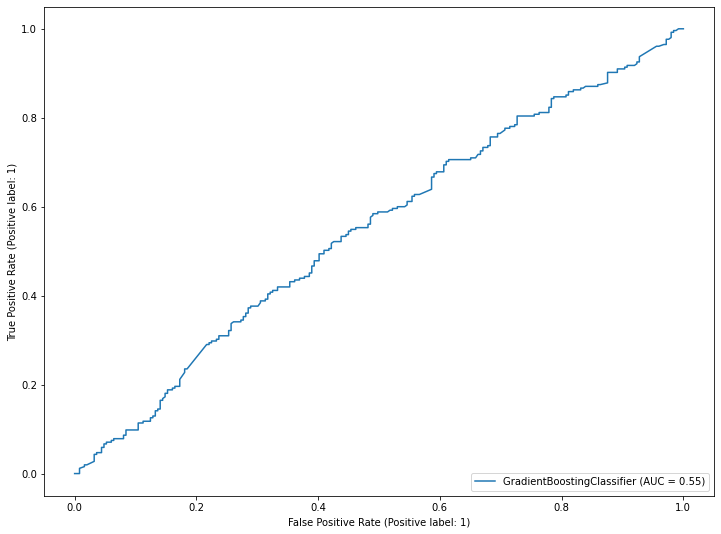

In [80]:
plot_roc_curve(gb, X_test, y_test)

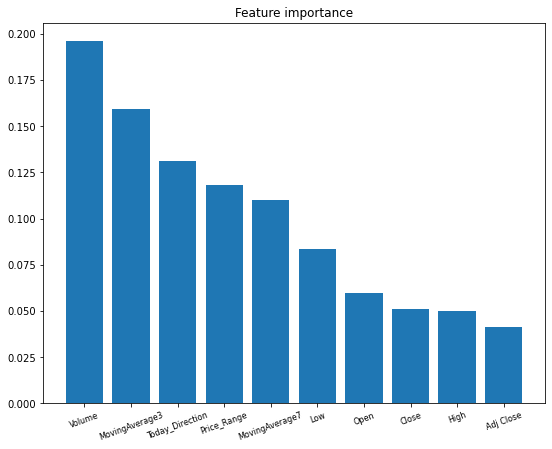

In [81]:
import numpy as np
# Calculate feature importances
importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_train[X_cols].columns[i] for i in indices]

_ = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)